# Spotify Hits

## Abstract

Este proyecto utiliza técnicas de aprendizaje automático para predecir el éxito de las canciones utilizando datos de la plataforma de música en línea Spotify. Se analizan características como el tempo, la energía y la popularidad de las canciones para determinar si serán éxitos. Se utilizan varios modelos de aprendizaje automático, incluyendo regresión logística y árboles de decisión, para predecir el éxito de las canciones. Los resultados muestran que estos modelos son capaces de predecir con precisión si una canción será popular o no, lo que sugiere que el análisis de características de la música puede ser útil para predecir su éxito en las listas. Este proyecto tiene implicaciones para la industria musical y podría ser útil para los productores y artistas al seleccionar las características de las canciones para aumentar su éxito en el mercado.

## Preguntas de interés

- ¿Existe una correlación entre las características de una canción, como el tempo, la energía y la popularidad, y su éxito?
- ¿Se pueden utilizar las características de una canción para predecir su éxito?
- ¿Es útil el análisis de características de las canciones utilizando datos de Spotify para predecir el éxito de las canciones?
- ¿El uso de técnicas de aprendizaje automático mejora la precisión de las predicciones sobre el éxito de las canciones en las listas de éxitos?

Para contestar estas interrogantes, se **construyó un dataset** con información acerca de canciones "hit" o "flop" (fracaso, en español) y sus características, mediante el uso de las API de Billboard y Spotify.

El procedimiento puede visualizarse desde el siguiente notebook: [construccion_dataset.ipynb](/construccion_dataset.ipynb).

## Motivación y audiencia

**Motivación**: El objetivo es analizar características de canciones utilizando datos de la plataforma de Spotify para determinar si pueden ser útiles para predecir su éxito. Se utilizan técnicas de visualización de datos para explorar las relaciones entre características como el tempo, la energía y la popularidad de las canciones para determinar su correlación con el éxito.

**Audiencia**: Este proyecto tiene implicaciones potenciales para la industria musical y podría ser útil para los productores y artistas al seleccionar las características de las canciones para aumentar su éxito en el mercado.

**Limitaciones**:	
- **Datos insuficientes**: los datos proporcionados por Spotify pueden ser insuficientes para algunas canciones o artistas en particular.
- **Cambios en la popularidad**: las preferencias de la audiencia en la música pueden cambiar rápidamente, por lo que lo que es popular hoy podría no serlo en el futuro.
- **Ausencia de variables importantes**: el éxito de una canción también puede verse afectado por variables importantes, como el marketing, la promoción y el contexto cultural, que no se consideraron en este proyecto.

## Importación de librerías y contenido del dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

### Contenido del dataset

- **track**: Nombre de la pista.

- **artist**: Nombre del artista.

- **uri**: Identificador de la pista.

- **danceability**: "Bailabilidad". Describe qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales que incluyen tempo, estabilidad del ritmo, fuerza del ritmo y regularidad general. Un valor de 0,0 es menos bailable y 1,0 es más bailable.
  
- **energy**: La energía es una medida de 0,0 a 1,0 y representa una medida perceptiva de intensidad y actividad. Por lo general, las pistas enérgicas se sienten rápidas, fuertes y ruidosas. Por ejemplo, el death metal tiene mucha energía, mientras que un preludio de Bach tiene una puntuación baja en la escala. Las características perceptivas que contribuyen a este atributo incluyen el rango dinámico, el volumen percibido, el timbre, la tasa de inicio y la entropía general.

- **key**: La tonalidad general estimada de la pista. Los números enteros se asignan a tonos utilizando la notación de clase de tono estándar. P.ej. 0 = C, 1 = C#/Db, 2 = D, y así sucesivamente. Si no se detectó ninguna tonalidad, el valor es -1.

- **loudness**: La sonoridad general de una canción en decibeles (dB). Los valores de sonoridad se promedian en toda la pista y son útiles para comparar la sonoridad relativa de las pistas. La sonoridad es la cualidad de un sonido que es el principal correlato psicológico de la fuerza física (amplitud). Los valores típicos oscilan entre -60 y 0 db.

- **mode**: Modo indica la modalidad (mayor o menor) de una pista, el tipo de escala de la que se deriva su contenido melódico. Mayor está representado por 1 y menor es 0.

- **speechiness**: Speechiness detecta la presencia de palabras habladas en una pista. Cuanto más parecida a la voz sea la grabación (por ejemplo, programa de entrevistas, audiolibro, poesía), más cerca de 1,0 será el valor del atributo. Los valores superiores a 0,66 describen pistas que probablemente estén formadas en su totalidad por palabras habladas. Los valores entre 0,33 y 0,66 describen pistas que pueden contener tanto música como voz, ya sea en secciones o en capas, incluidos casos como la música rap. Los valores por debajo de 0,33 probablemente representen música y otras pistas que no sean de voz.

- **acousticness**: Una medida de confianza de 0,0 a 1,0 de si la pista es acústica. 1.0 representa una alta confianza en que la pista es acústica.

- **instrumentalness**: Predice si una pista no contiene voces. Los sonidos “Ooh” y “aah” se tratan como instrumentales en este contexto. Las pistas de rap o de palabras habladas son claramente "vocales". Cuanto más cerca esté el valor de instrumentalidad de 1,0, mayor será la probabilidad de que la pista no contenga contenido vocal. Los valores superiores a 0,5 pretenden representar pistas instrumentales, pero la confianza es mayor a medida que el valor se acerca a 1,0.

- **liveness**: Detecta la presencia de una audiencia en la grabación. Los valores de liveness más altos representan una mayor probabilidad de que la pista se interprete en vivo. Un valor superior a 0,8 proporciona una gran probabilidad de que la pista sea en vivo.
  
- **valence**: Una medida de 0,0 a 1,0 que describe la positividad musical transmitida por una pista. Las pistas con una valencia alta suenan más positivas (p. ej., felices, alegres, eufóricas), mientras que las pistas con una valencia baja suenan más negativas (p. ej., tristes, deprimidas, enfadadas).

- **tempo**: El tempo general estimado de una pista en pulsaciones por minuto (BPM). En terminología musical, el tempo es la velocidad o ritmo de una pieza dada y se deriva directamente de la duración promedio del tiempo.
  
- **duration_ms**: La duración de la pista en milisegundos.

- **time_signature**: Una estimación general del compás de una pista. El compás (medidor) es una convención de notación para especificar cuántos tiempos hay en cada compás (o compás).

- **chorus_hit**: Esta es la mejor estimación de cuándo comenzaría el coro para la pista. Es la marca de tiempo del inicio de la tercera sección de la pista. Esta función se extrajo de los datos recibidos por la API para el análisis de audio de esa pista en particular.

- **sections**: El número de secciones que tiene la pista en particular. Esta función se extrajo de los datos recibidos por la API para el análisis de audio de esa pista en particular.

- **target**: La variable destino para la pista. Puede ser '0' o '1'. '1' implica que esta canción ha aparecido en la lista semanal (emitida por Billboards) de pistas Hot-100 en esa década al menos una vez y, por lo tanto, es un 'éxito'. '0' implica que la pista es un 'flop' o 'fracaso'.

#### Criterio para que una canción sea un 'flop'

- La pista no debe aparecer en la lista 'hit' de la década.
- El artista de la pista no debe aparecer en la lista de 'hits' de la década.
- La pista debe pertenecer a un género que podría considerarse no convencional.
- El género de la pista no debe tener una canción en la lista de 'hits'.
- La pista debe tener 'US' como uno de sus mercados.

## EDA

### Carga y revisión de datos

In [6]:
datasets = [pd.read_csv("Datasets/dataset-of-{}s.csv".format(decade)) for decade in ['1970', '1980', '1990', '2000', '2010']]

for i, decade in enumerate([1970, 1980, 1990, 2000, 2010]):
    datasets[i]['decade'] = pd.Series(decade, index=datasets[i].index)

df = pd.concat(datasets, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Everyone's Heart Gets Broken,Ebony,spotify:track:72dyzh7rRthEYDhEfJuJUe,0.577,0.457,9,-9.716,1,0.0274,0.573,0.000091,0.1900,0.739,125.222,197533,3,29.15381,9,0,1970
1,Adios a Jamaica,Los Gibson Boys,spotify:track:2chBwIMZqVq7yDkco7bOO3,0.554,0.667,4,-6.502,1,0.0471,0.716,0.000000,0.0651,0.917,148.870,143667,4,31.63368,7,0,1990
2,So Sexy,Twista Featuring R. Kelly,spotify:track:4mZpHYUrOvvmXCoyLLF7s7,0.868,0.805,11,-3.218,0,0.1780,0.126,0.000000,0.0960,0.544,143.983,231200,4,27.22702,9,1,2000
3,It Ain't Enough,Corey Hart,spotify:track:3q9LRpghuXumIQLna5MZjq,0.747,0.406,2,-12.134,1,0.0302,0.499,0.000122,0.0670,0.602,112.347,210027,4,31.79598,10,1,1980
4,BTSTU (Edit),Jai Paul,spotify:track:2NRRrr8ylDK38KD3Ffbw4K,0.665,0.389,1,-6.709,1,0.4410,0.745,0.000982,0.3260,0.521,89.962,210001,4,27.11471,10,0,2010


In [7]:
rows, columns = df.shape

print(f'El dataset tiene {rows} filas y {columns} columnas')

El dataset tiene 32464 filas y 20 columnas


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32464 entries, 0 to 32463
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             32464 non-null  object 
 1   artist            32464 non-null  object 
 2   uri               32464 non-null  object 
 3   danceability      32464 non-null  float64
 4   energy            32464 non-null  float64
 5   key               32464 non-null  int64  
 6   loudness          32464 non-null  float64
 7   mode              32464 non-null  int64  
 8   speechiness       32464 non-null  float64
 9   acousticness      32464 non-null  float64
 10  instrumentalness  32464 non-null  float64
 11  liveness          32464 non-null  float64
 12  valence           32464 non-null  float64
 13  tempo             32464 non-null  float64
 14  duration_ms       32464 non-null  int64  
 15  time_signature    32464 non-null  int64  
 16  chorus_hit        32464 non-null  float6

In [9]:
df.isna().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
decade              0
dtype: int64

Gracias al procedimiento de limpieza previo, el dataset no cuenta con duplicados ni datos nulos.

### Variables categóricas vs numéricas

In [10]:
numeric_cols = df._get_numeric_data().columns
print(f'Hay {len(numeric_cols)} variables numéricas')
numeric_cols

Hay 17 variables numéricas


Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections', 'target',
       'decade'],
      dtype='object')

In [11]:
categorical_cols = df.columns[df.dtypes == 'object']
print(f'Hay {len(categorical_cols)} variables categóricas')
categorical_cols

Hay 3 variables categóricas


Index(['track', 'artist', 'uri'], dtype='object')

Para el análisis, las variables categóricas podrían no estar, ya que no aportan información muy relevante.

In [12]:
clean_df = df.drop(['track', 'artist', 'uri'], axis = 1)
clean_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,0.577,0.457,9,-9.716,1,0.0274,0.573000,0.000091,0.1900,0.7390,125.222,197533,3,29.15381,9,0,1970
1,0.554,0.667,4,-6.502,1,0.0471,0.716000,0.000000,0.0651,0.9170,148.870,143667,4,31.63368,7,0,1990
2,0.868,0.805,11,-3.218,0,0.1780,0.126000,0.000000,0.0960,0.5440,143.983,231200,4,27.22702,9,1,2000
3,0.747,0.406,2,-12.134,1,0.0302,0.499000,0.000122,0.0670,0.6020,112.347,210027,4,31.79598,10,1,1980
4,0.665,0.389,1,-6.709,1,0.4410,0.745000,0.000982,0.3260,0.5210,89.962,210001,4,27.11471,10,0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32459,0.539,0.937,10,-5.740,0,0.0448,0.000236,0.057400,0.0915,0.4920,114.860,230693,4,66.63641,8,0,1990
32460,0.638,0.557,0,-11.340,1,0.1110,0.729000,0.000010,0.0986,0.9150,112.893,215053,4,36.99424,9,1,1970
32461,0.201,0.475,11,-10.097,0,0.0417,0.659000,0.916000,0.0748,0.0398,73.563,158333,3,36.05006,7,0,1980
32462,0.641,0.789,9,-12.803,1,0.1540,0.127000,0.000218,0.1390,0.5480,107.672,232787,4,37.48169,10,0,1970


### Distribución de las variables

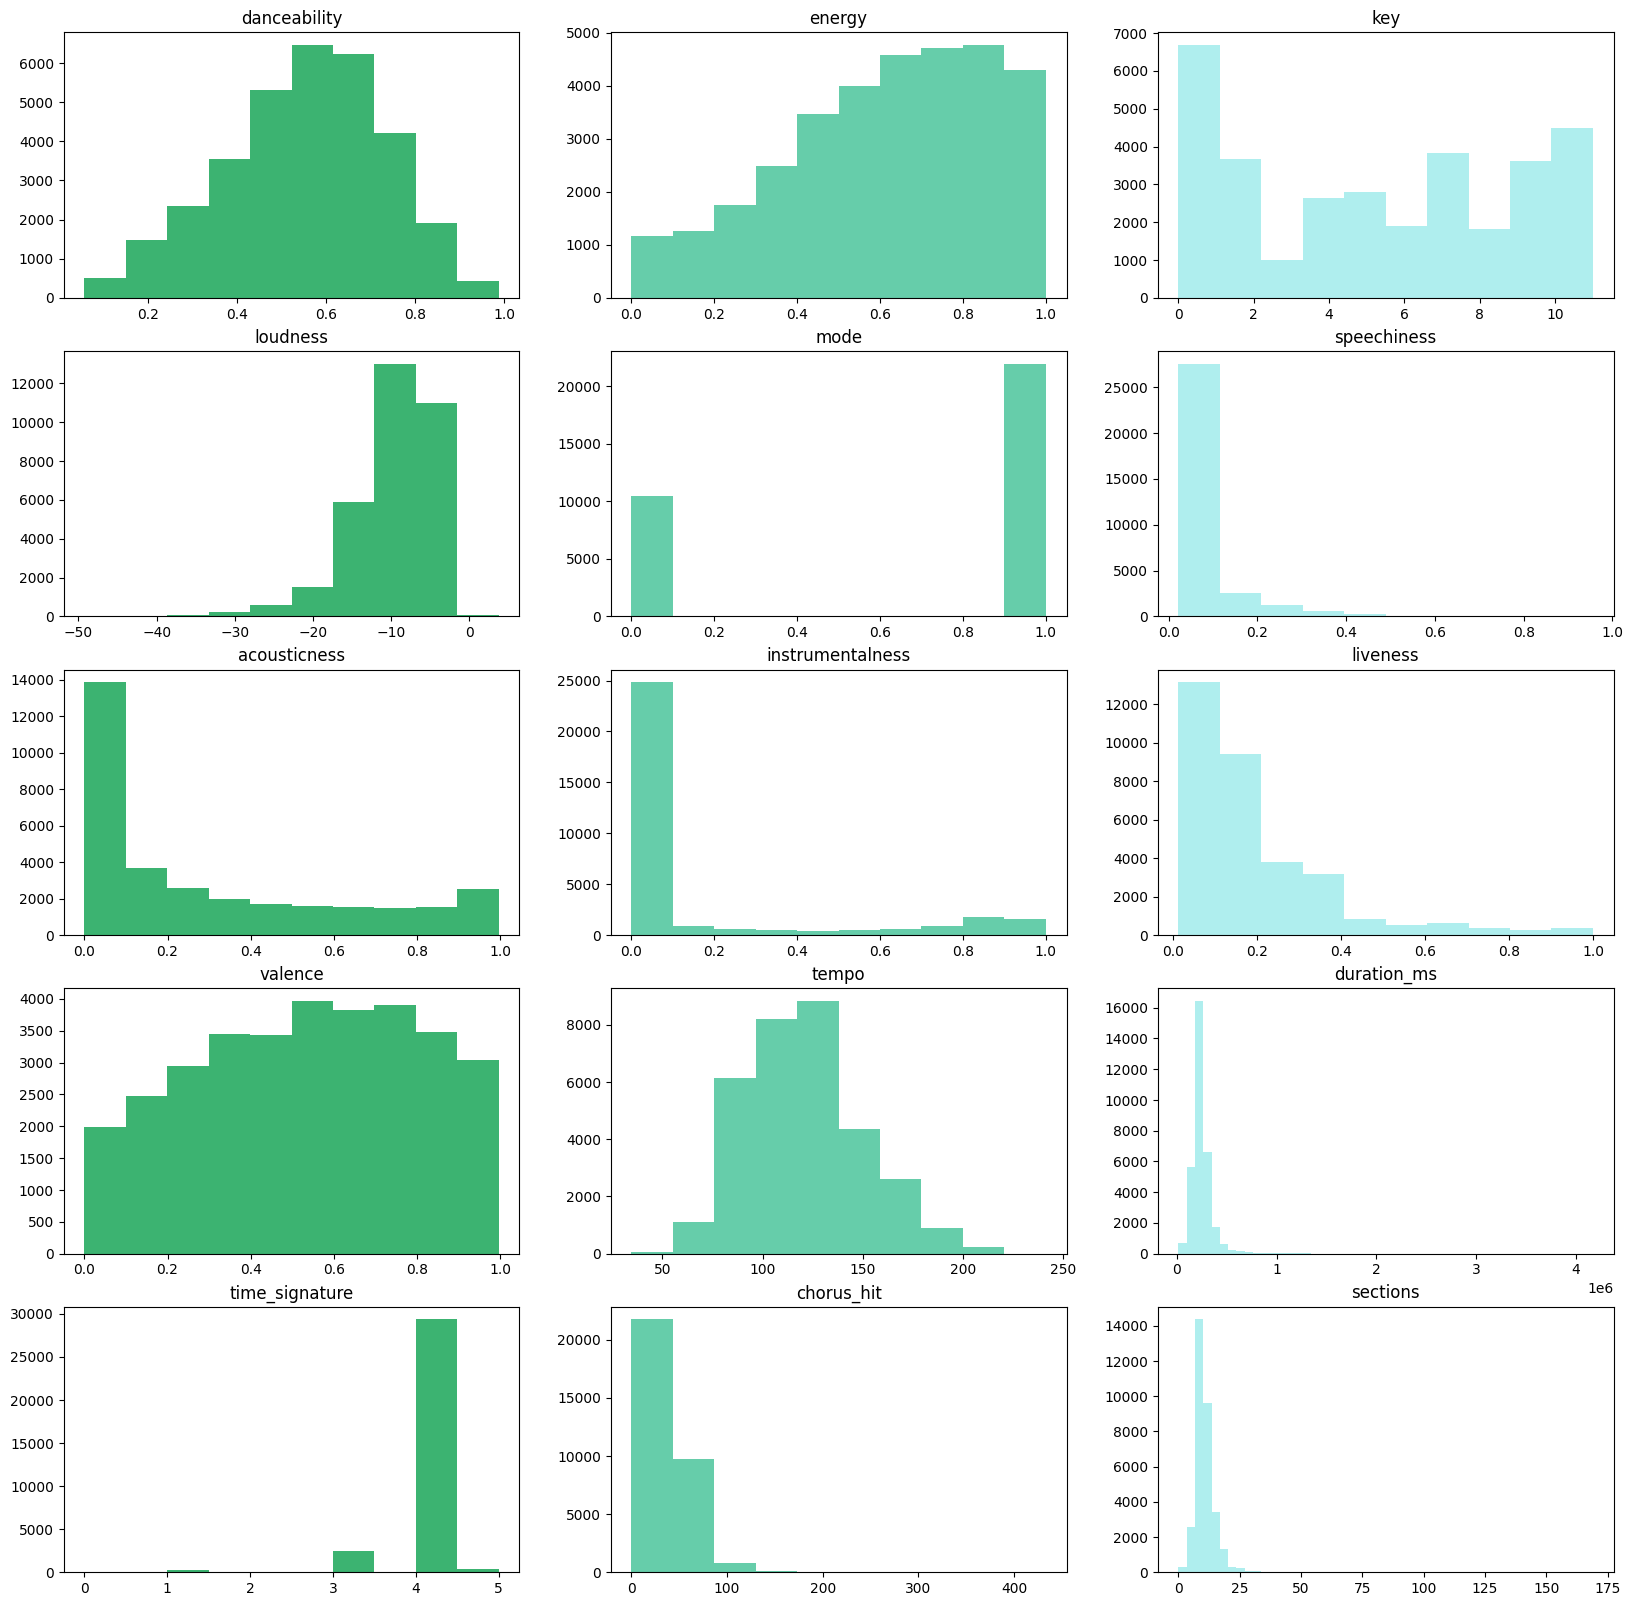

In [13]:
fig, ax = plt.subplots(5, 3, figsize=(20, 20))

def hist_plot(row, column, variable, binsnum, color):
    ax[row, column].hist(clean_df[variable], bins = binsnum, color = color)
    ax[row, column].set_title(variable)

plot_params = [(0, 0, 'danceability', 10, 'mediumseagreen'),
               (0, 1, 'energy', 10, 'mediumaquamarine'),
               (0, 2, 'key', 10, 'paleturquoise'),
               (1, 0, 'loudness', 10, 'mediumseagreen'),
               (1, 1, 'mode', 10, 'mediumaquamarine'),
               (1, 2, 'speechiness', 10, 'paleturquoise'),
               (2, 0, 'acousticness', 10, 'mediumseagreen'),
               (2, 1, 'instrumentalness', 10, 'mediumaquamarine'),
               (2, 2, 'liveness', 10, 'paleturquoise'),
               (3, 0, 'valence', 10, 'mediumseagreen'),
               (3, 1, 'tempo', 10, 'mediumaquamarine'),
               (3, 2, 'duration_ms', 50, 'paleturquoise'),
               (4, 0, 'time_signature', 10, 'mediumseagreen'),
               (4, 1, 'chorus_hit', 10, 'mediumaquamarine'),
               (4, 2, 'sections', 50, 'paleturquoise'),]

for i, params in enumerate(plot_params):
    row, col, variable, binsnum, color = params
    hist_plot(row, col, variable, binsnum, color)

plt.show()

A partir de los histogramas, se tiene lo siguiente:

- Las canciones tienden a ser más bailables que menos bailables.
- Las canciones tienden a tener más energía que menos energía.
- La tonalidad de Do (C) es la más popular.
- Las canciones tienden a tener menos de 10 dB.
- La mayoría de las canciones están en escalas mayores.
- La mayoría de las canciones contienen más música que voz
- La mayoría de las canciones no son en vivo.
- La mayoría de las canciones no son acústicas.
- La mayoría de las canciones contienen música.
- Hay una buena mezcla de canciones alegres y tristes.
- La mayoría de las canciones tienen entre 80 y 90 bpm.
- La mayoría de las canciones están en 4/4.

### Outliers

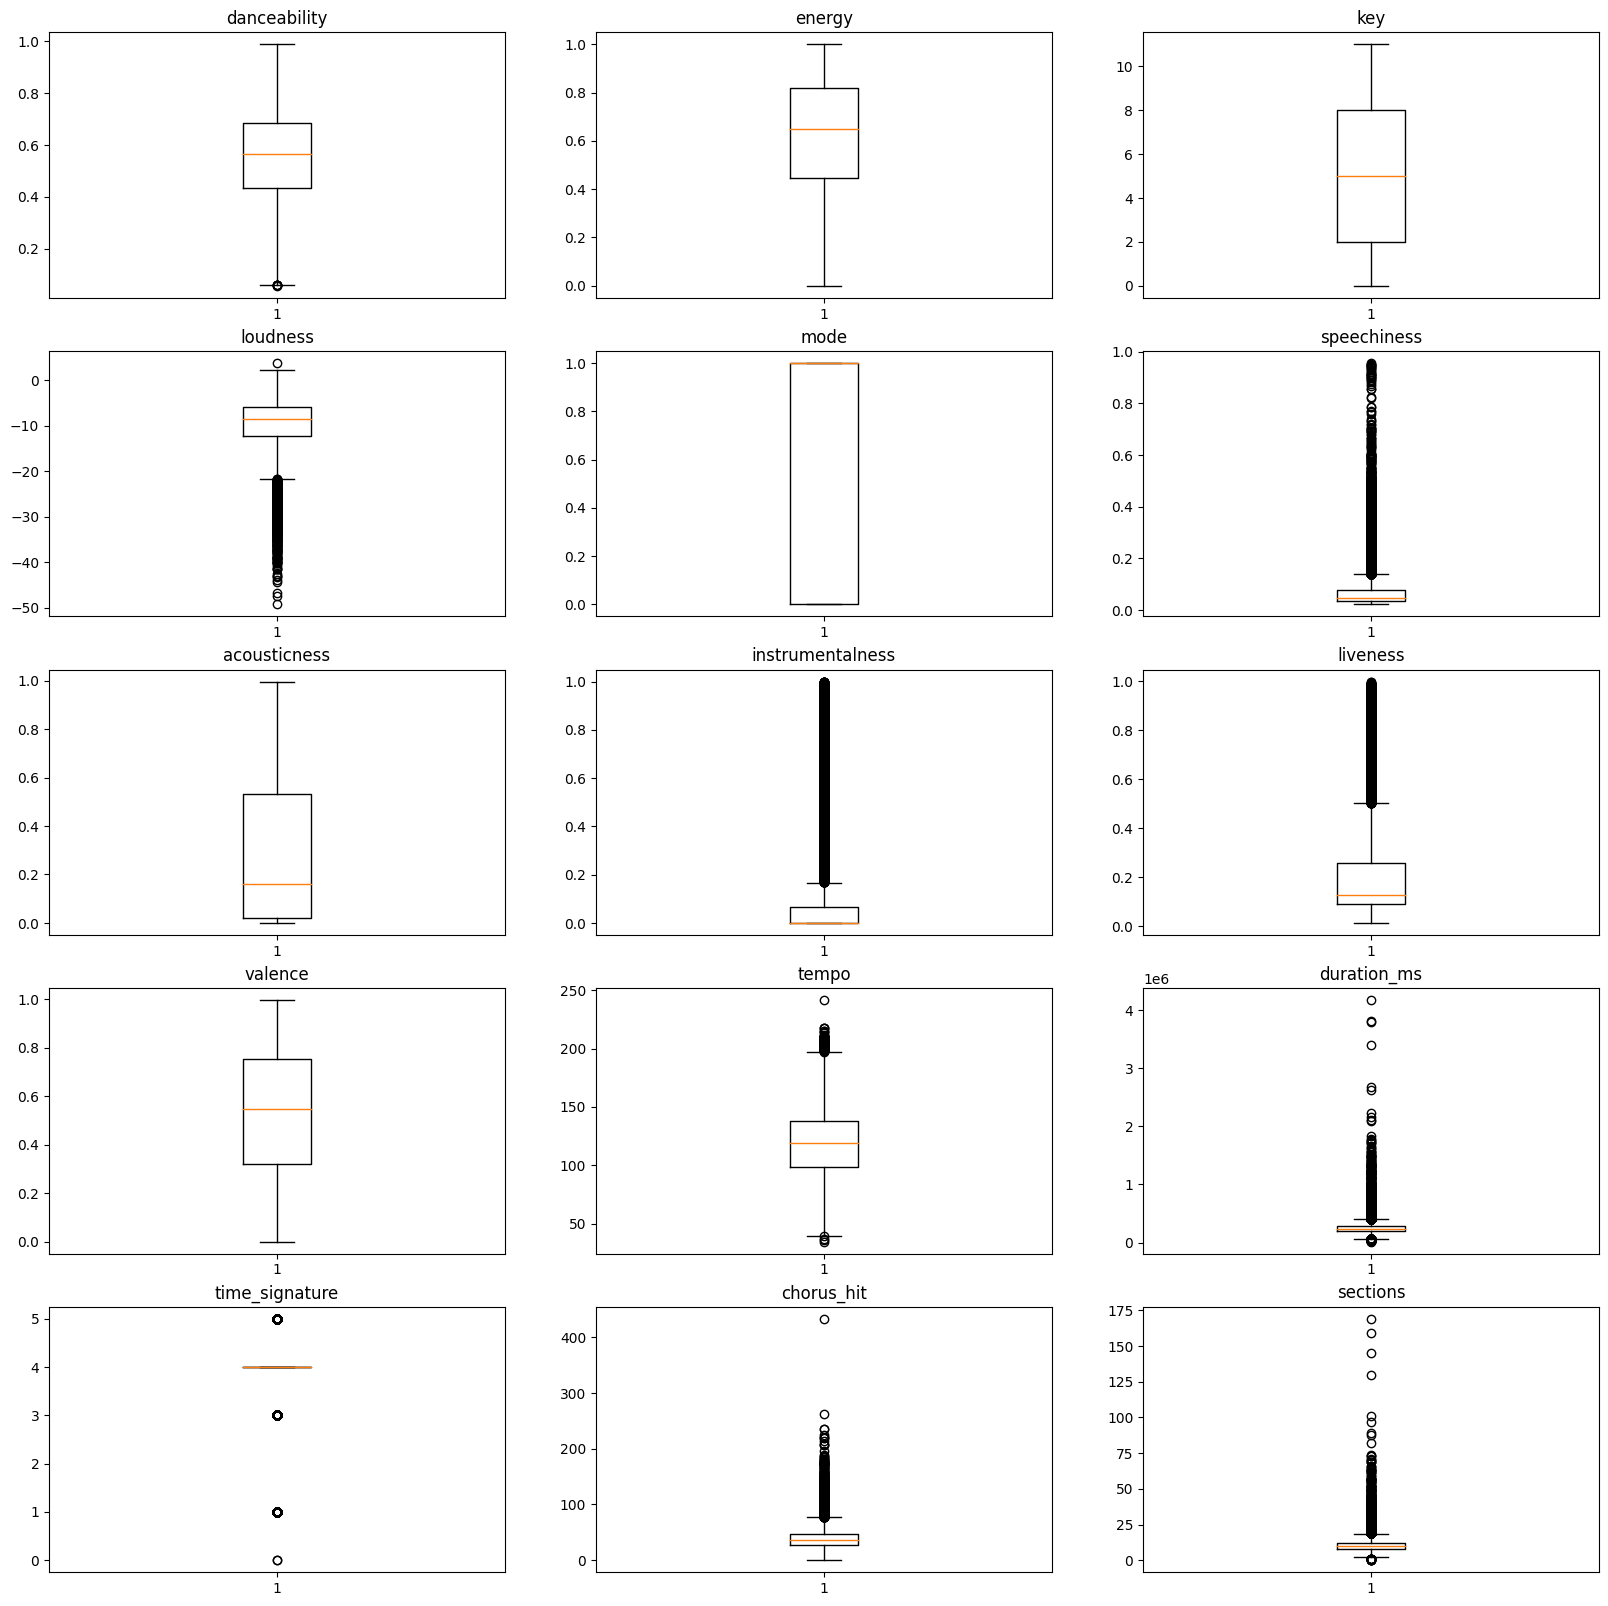

In [14]:
def box_plot(row, column, variable):
    ax[row, column].boxplot(clean_df[variable])
    ax[row, column].set_title(variable)

fig, ax = plt.subplots(5, 3, figsize=(20, 20))

plot_params = [(0, 0, 'danceability'),
               (0, 1, 'energy'),
               (0, 2, 'key'),
               (1, 0, 'loudness'),
               (1, 1, 'mode'),
               (1, 2, 'speechiness'),
               (2, 0, 'acousticness'),
               (2, 1, 'instrumentalness'),
               (2, 2, 'liveness'),
               (3, 0, 'valence'),
               (3, 1, 'tempo'),
               (3, 2, 'duration_ms'),
               (4, 0, 'time_signature'),
               (4, 1, 'chorus_hit'),
               (4, 2, 'sections')]

for i, params in enumerate(plot_params):
    row, col, variable = params
    box_plot(row, col, variable)

plt.show()

Ahora un vistazo en cuanto a la diferencia de "hits" vs "fracasos".

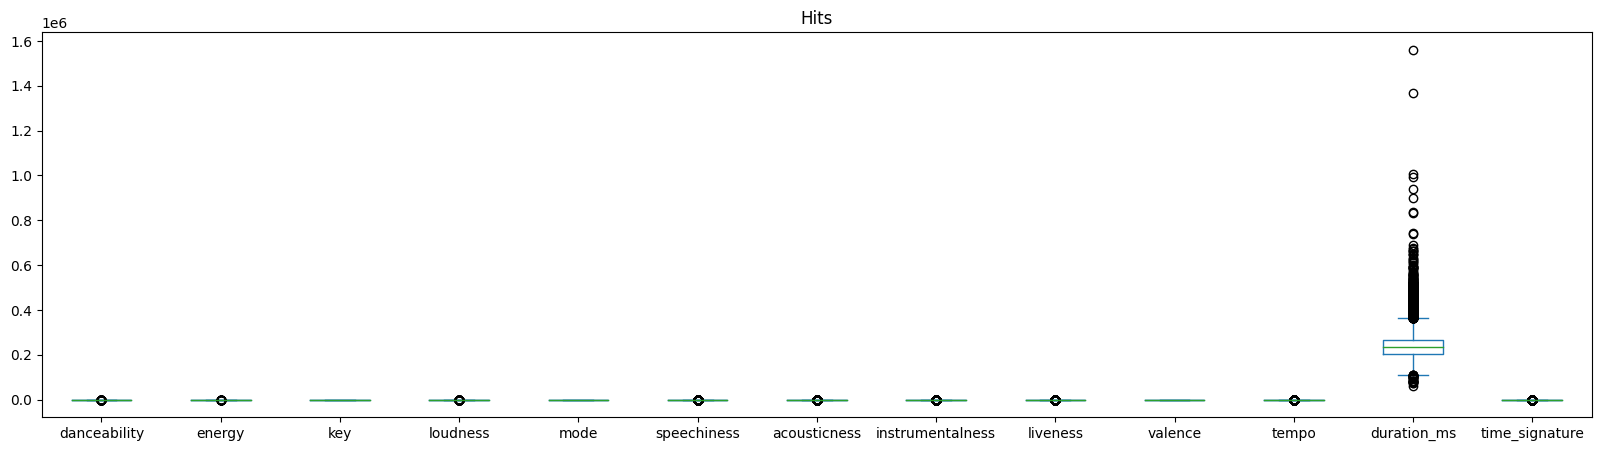

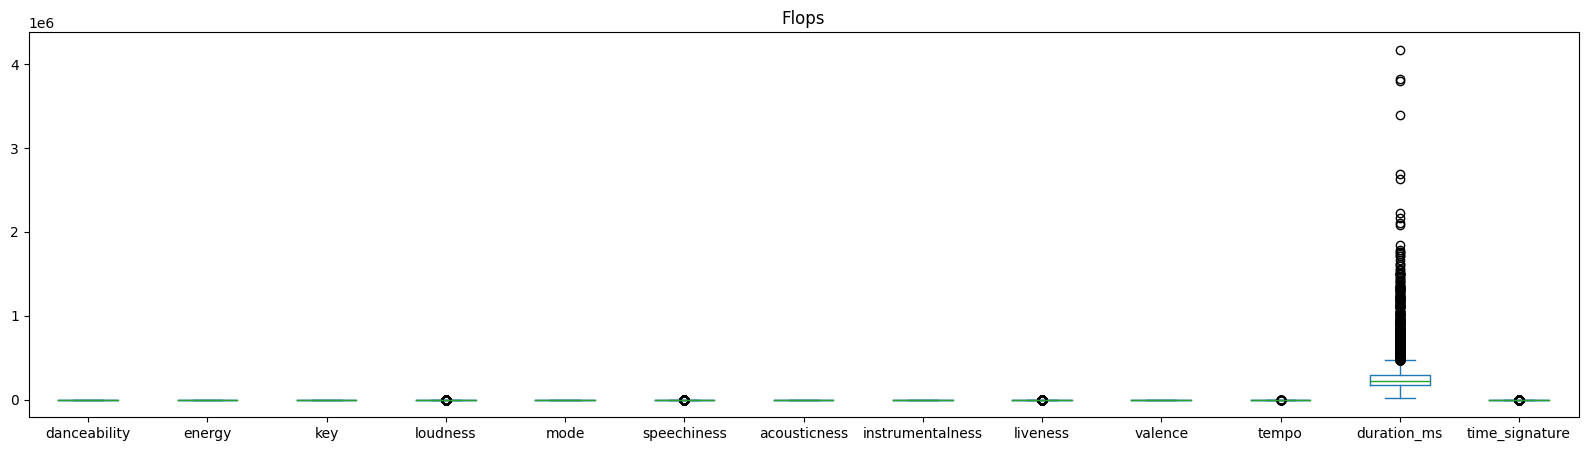

In [15]:
mpl.rcParams['figure.figsize']=(20,5)
clean_df[clean_df['target']==1].iloc[:, 0:13].plot(kind='box', title = 'Hits')
plt.show()
clean_df[clean_df['target']==0].iloc[:, 0:13].plot(kind='box', title = 'Flops')
plt.show()

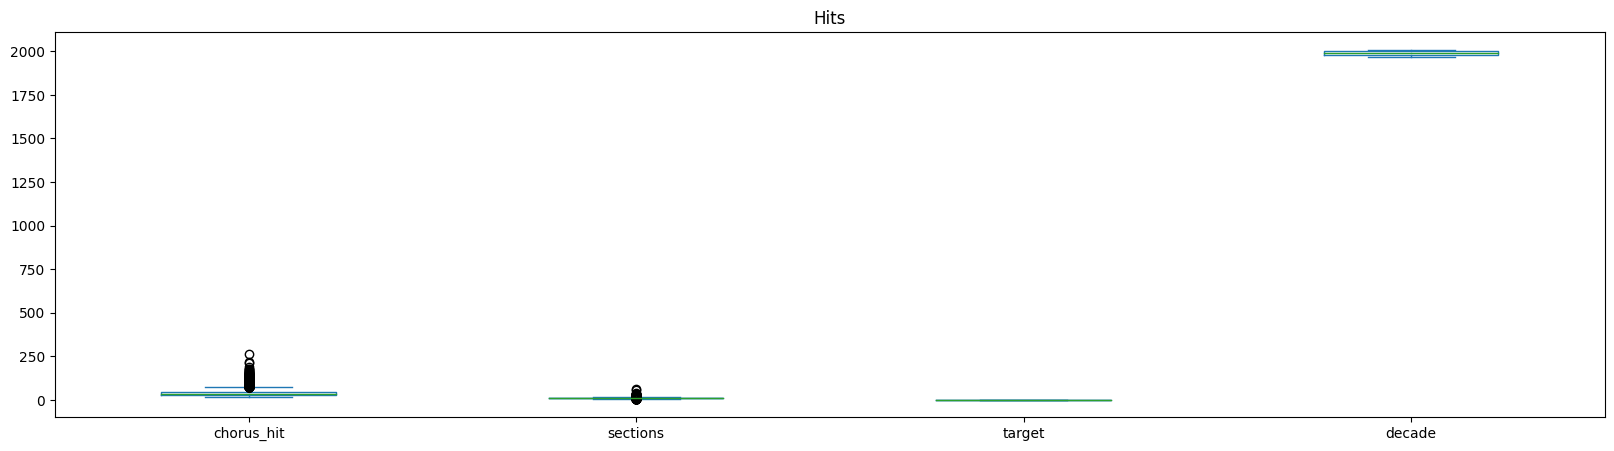

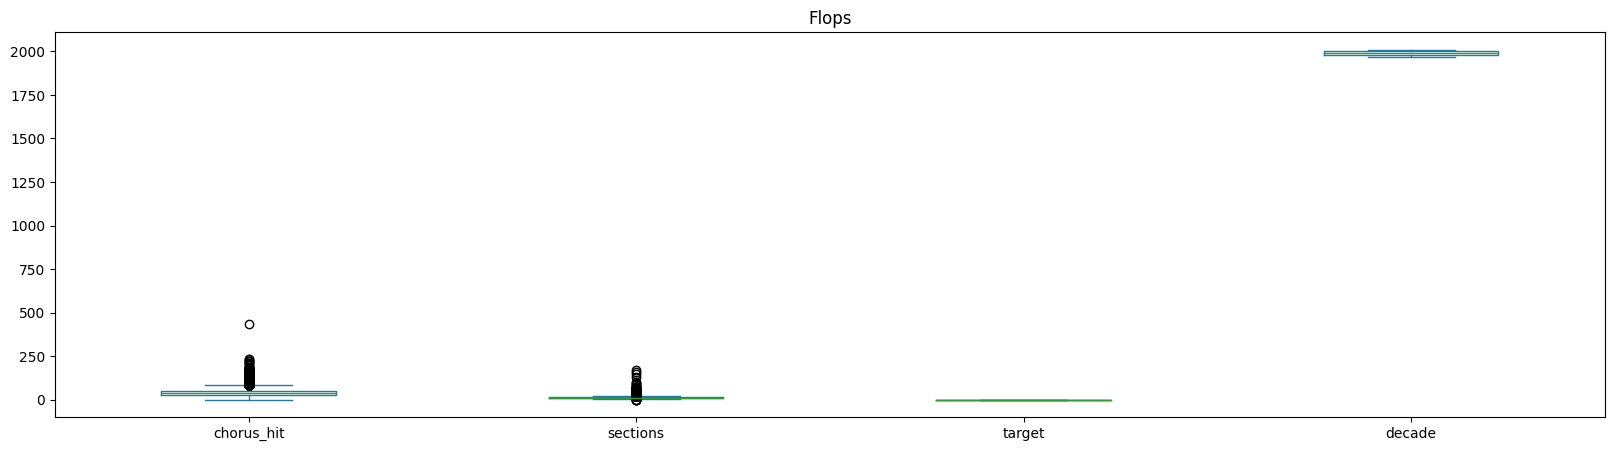

In [16]:
clean_df[clean_df['target']==1].iloc[:, 13:18].plot(kind='box', title = 'Hits')
plt.show()
clean_df[clean_df['target']==0].iloc[:, 13:18].plot(kind='box', title = 'Flops')
plt.show()

Como el dataset no fue escalado, algunos boxplots no son muy sencillos de leer, sin embargo puede observarse que sí hay diferencias entre los "Hits" y los "Fracasos".


## Comparación de medias

In [17]:
spfeatures = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence']

In [18]:
# Medias por target y características

hits = clean_df[spfeatures].loc[clean_df['target'] == 1]
flops = clean_df[spfeatures].loc[clean_df['target'] == 0]

hits_means = pd.DataFrame(hits.describe().loc['mean'])
flops_means = pd.DataFrame(flops.describe().loc['mean'])

means = pd.concat([hits_means,flops_means],axis=1)
means.columns = ['hit_mean','flop_mean']
means

,hit_mean,flop_mean
danceability,0.620046,0.484647
energy,0.654415,0.576196
key,5.277415,5.222770
loudness,-8.237079,-11.243276
mode,0.701084,0.652477
speechiness,0.074802,0.076740
acousticness,0.212672,0.381898
instrumentalness,0.025481,0.285745
liveness,0.185576,0.211107
valence,0.595244,0.472321


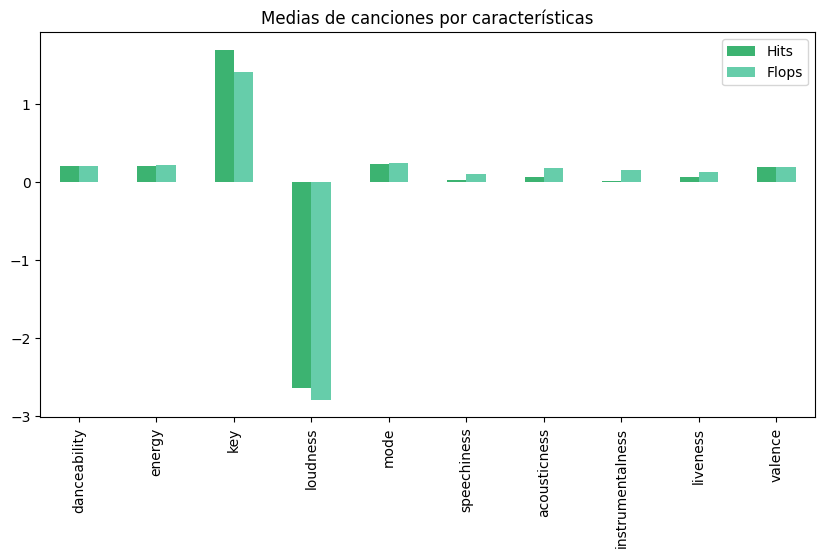

In [19]:
# Escalado

ss = StandardScaler()
means_scaled = pd.DataFrame(ss.fit_transform(means),index= means.index, columns = means.columns)
means_scaled

# Gráfico

means_scaled.plot(kind = 'bar',
                  figsize=(10, 5),
                  color = ('mediumseagreen', 'mediumaquamarine'),
                  title = 'Medias de canciones por características')
plt.legend(labels=['Hits', 'Flops'], loc='upper right')
plt.show()

A juzgar por las diferencias en las medias entre éxitos y fracasos, parece haber una diferencia entre los dos tipos de canciones. Esto significa que posiblemente se podría crear un modelo para predecir éxitos y fracasos en función de las características de las canciones.

## Correlación de variables

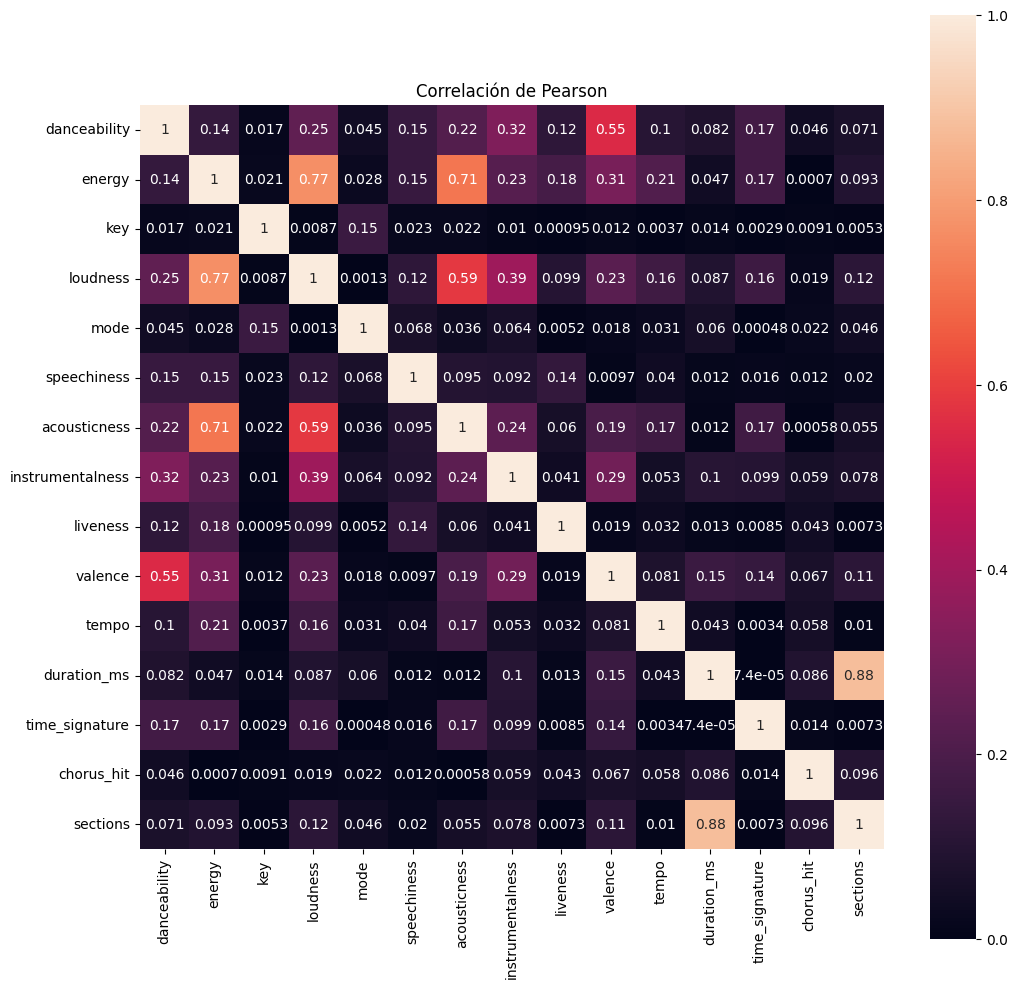

In [20]:
pearson_corr = clean_df.drop(['target', 'decade'], axis=1).corr(method='pearson')

fig, ax = plt.subplots(figsize=(12, 12))
plt.title('Correlación de Pearson')
sns.heatmap(pearson_corr.abs(),
            square=True,
            vmin=0,
            vmax=1,
            ax=ax,
            annot=True)
plt.show()

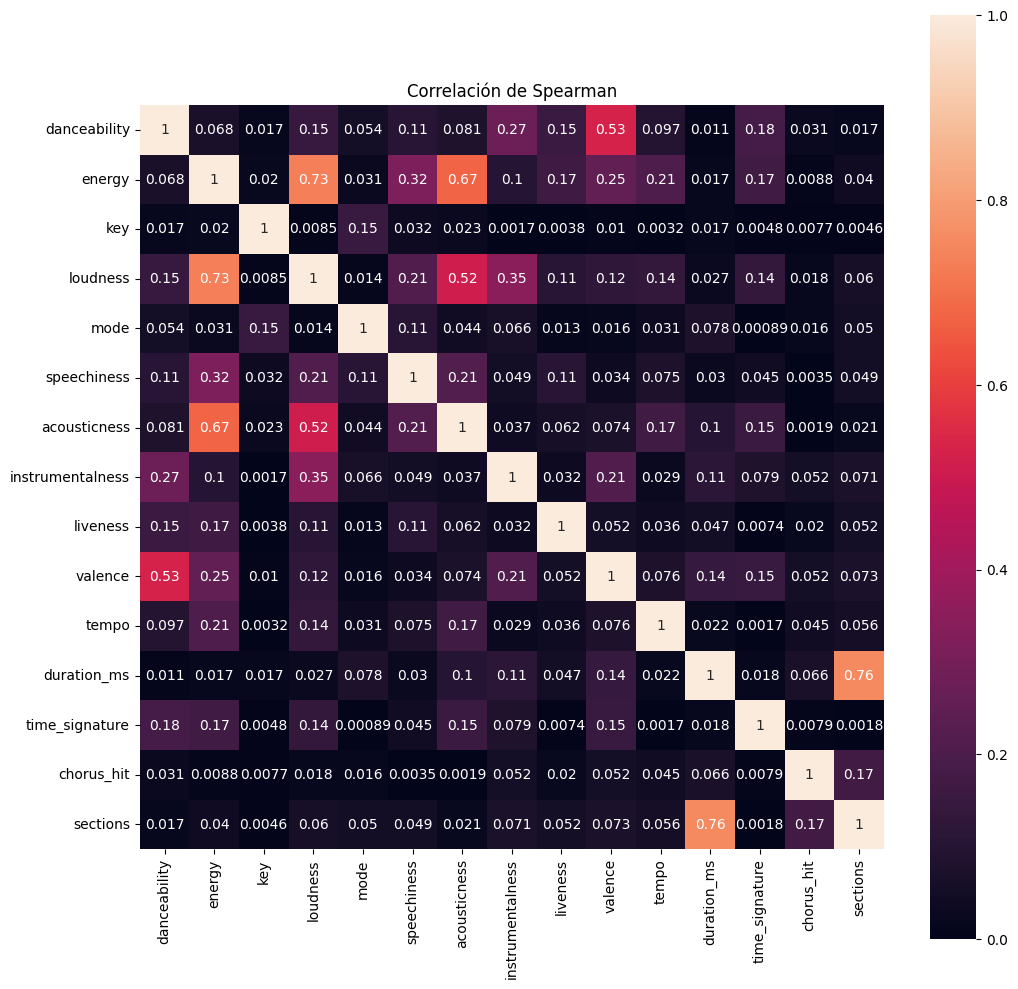

In [21]:
spearman_corr = clean_df.drop(['target', 'decade'], axis=1).corr(method='spearman')

fig, ax = plt.subplots(figsize=(12, 12))
plt.title('Correlación de Spearman')
sns.heatmap(spearman_corr.abs(),
            square=True,
            vmin=0,
            vmax=1,
            ax=ax,
            annot=True)
plt.show()

Los valores de correlación entre dos variables cualesquiera no superan el 90%. Las únicas variables que podrían llegar a estar correlacionadas, según ambos criterios, son las de `duration_ms` y `sections`.

## Insights preliminares

Luego del análisis exploratorio, se pudo obtener lo siguiente:

- Las canciones tienden a ser más bailables que menos bailables.
- Las canciones tienden a tener más energía que menos energía.
- La tonalidad de Do (C) es la más popular.
- Las canciones tienden a tener menos de 10 dB.
- La mayoría de las canciones están en escalas mayores.
- La mayoría de las canciones contienen más música que voz
- La mayoría de las canciones no son en vivo.
- La mayoría de las canciones no son acústicas.
- La mayoría de las canciones contienen música.
- Hay una buena mezcla de canciones alegres y tristes.
- La mayoría de las canciones tienen entre 80 y 90 bpm.
- La mayoría de las canciones están en 4/4.
- Existen claras diferencias entre las características de canciones exitosas vs los fracasos.
- Los valores de correlación entre dos variables cualesquiera no superan el 90%.

## Machine Learning

### PCA

Antes de la elección de algoritmos de ML y su entrenamiento, se realizará PCA para analizar la posibilidad de reducir la dimensionalidad.

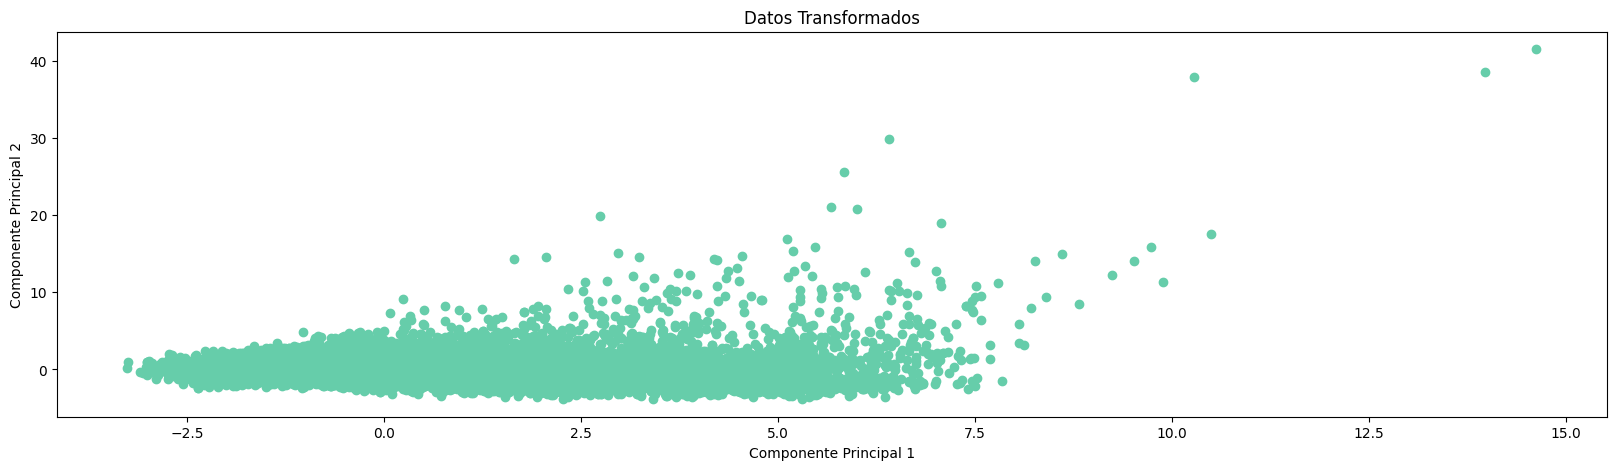

In [22]:
scaled_data = ss.fit_transform(clean_df.drop(['target', 'decade'], axis=1))

pca = PCA(n_components=2)
pca.fit(scaled_data)

transformed_data = pca.transform(scaled_data)

plt.scatter(transformed_data[:, 0], transformed_data[:, 1], color="mediumaquamarine")
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Datos Transformados')
plt.show()


Dado que la mayoría de los puntos se acumulan en una región específica y hay pocos puntos esparcidos en otras áreas, la reducción de la dimensionalidad mediante PCA puede no ser la mejor opción, ya que se podría perder información importante al eliminar componentes principales.

/tmp/ipykernel_50627/663167978.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(component_names, rotation=45)
/tmp/ipykernel_50627/663167978.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(component_names, rotation=45)


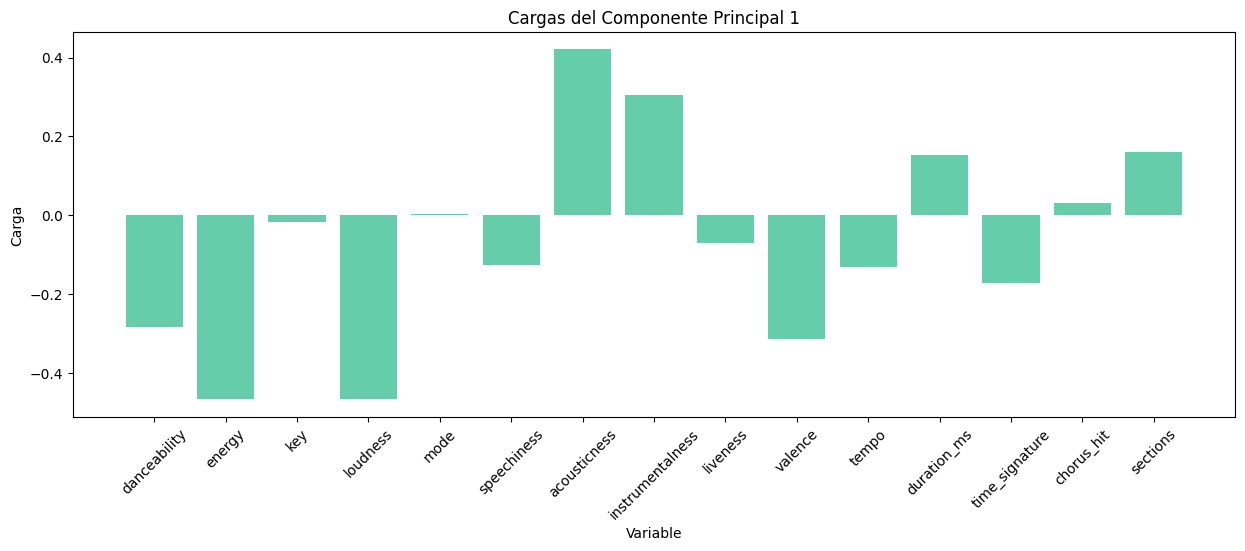

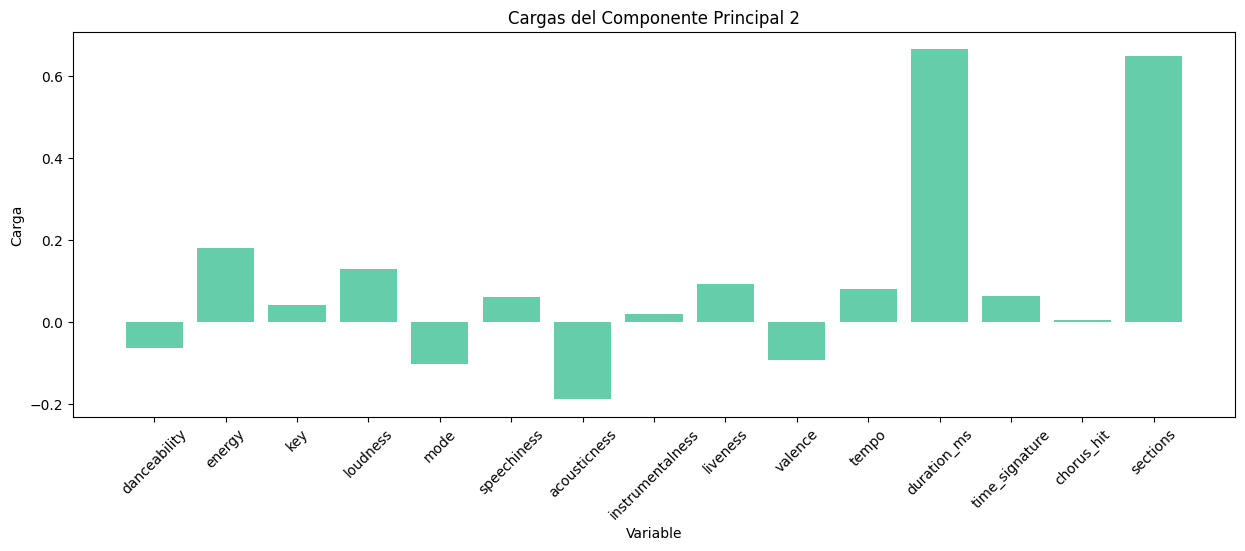

In [23]:
variables = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections']
loadings = pca.components_[:2, :]
component_names = [variables[i] for i in range(loadings.shape[1])]

# Visualizar las cargas de las variables
fig, ax = plt.subplots(figsize=(15, 5))
plt.bar(component_names, loadings[0], color="mediumaquamarine")
plt.xlabel('Variable')
plt.ylabel('Carga')
plt.title('Cargas del Componente Principal 1')
ax.set_xticklabels(component_names, rotation=45)

fig, ax = plt.subplots(figsize=(15, 5))
plt.bar(component_names, loadings[1], color="mediumaquamarine")
plt.xlabel('Variable')
plt.ylabel('Carga')
plt.title('Cargas del Componente Principal 2')
ax.set_xticklabels(component_names, rotation=45)

plt.show()

En este caso, las variables con menos carga, son: `key`, `mode` y `chorus_hit`. Por otro lado, las variables que tenían más alto valor de correlación, `duration_ms` y `sections`, tienen alta carga en la segunda componente principal, por lo que, quizá es buena opción mantenerlas. Se eliminarán las variables con menos carga y analizarán los resultados obtenidos.

In [24]:
# Varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print("Varianza explicada por cada componente principal:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Componente {i+1}: {ratio:.2f}")

print("\nVarianza acumulativa explicada:")
for i, ratio in enumerate(cumulative_variance_ratio):
    print(f"Hasta el componente {i+1}: {ratio:.2f}")

Varianza explicada por cada componente principal:
Componente 1: 0.21
Componente 2: 0.12

Varianza acumulativa explicada:
Hasta el componente 1: 0.21
Hasta el componente 2: 0.33


El 33% de la varianza total de los datos está capturada por estas dos principales componentes. Esto significa que estas dos componentes son importantes para explicar la variabilidad en los datos y pueden ser consideradas como las más informativas en términos de reducción de dimensionalidad.

### División de Test/Train

In [25]:
indep_vars = ['danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'duration_ms', 'sections']

X = clean_df[indep_vars]
y = clean_df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

Se dividió a los datos en 75% para training y 25% para testing, eliminando las variables de `key`, `mode` y `chorus_hit`.

### Regresión logística

In [ ]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

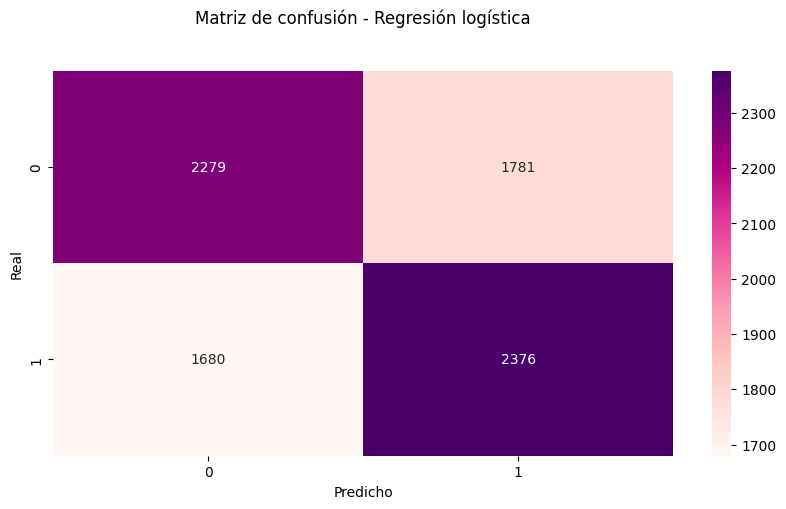

In [27]:
lr_cnf_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))

mpl.rcParams['figure.figsize']=(10,5)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(lr_cnf_matrix, annot=True, cmap="RdPu" ,fmt='g')
plt.title('Matriz de confusión - Regresión logística', y=1.1)
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

La matriz de confusión demuestra que el modelo identificó correctamente los éxitos y los fracasos la mayor parte del tiempo.

In [28]:
accuracy = metrics.accuracy_score(y_test, y_pred) * 100
precision = metrics.precision_score(y_test, y_pred) * 100
recall = metrics.recall_score(y_test, y_pred) * 100

print(f'Accuracy: {accuracy:.2f}%')
print(f'Precision: {precision:.2f}%')
print(f'Recall: {recall:.2f}%')

Accuracy: 57.36%
Precision: 57.16%
Recall: 58.58%


El modelo es bastante inexacto e impresciso, por lo que se realizará cross validation para intentar mejorarlo.

#### Cross Validation

In [29]:
param_grid = {
              'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
              'C' : np.logspace(0, 5, 10),
              'solver' : ['liblinear', 'lbfgs', 'newton-cg']
              }

grid_search = GridSearchCV(LR, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación:")
print(grid_search.best_score_)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


/home/tyler/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/tyler/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/tyler/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/tyler/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/tyler/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did 

Mejores parámetros encontrados:
{'C': 166.81005372000593, 'penalty': 'l2', 'solver': 'newton-cg'}
Mejor puntuación:
0.7527517425115451


/home/tyler/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/tyler/.local/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


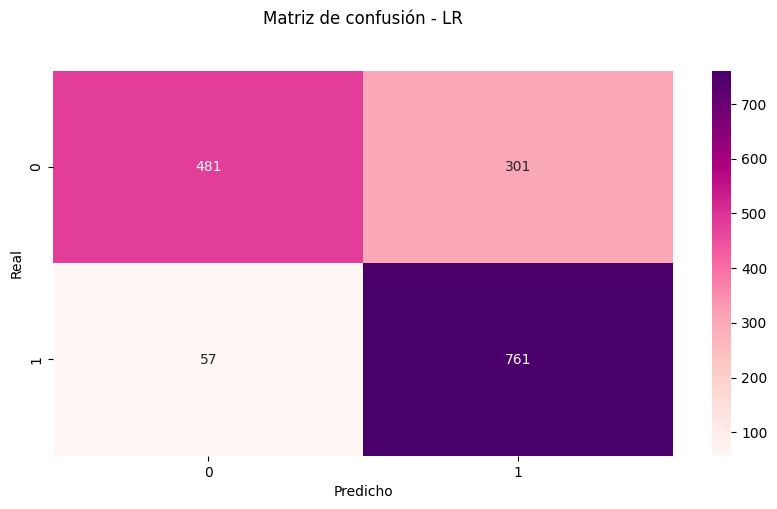

In [42]:
y_pred = grid_search.predict(X_test)

LR_final_cnf_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))

mpl.rcParams['figure.figsize']=(10,5)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(LR_final_cnf_matrix, annot=True, cmap="RdPu" ,fmt='g')
plt.title('Matriz de confusión - LR', y=1.1)
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

In [43]:
accuracy = metrics.accuracy_score(y_test, y_pred) * 100
precision = metrics.precision_score(y_test, y_pred) * 100
recall = metrics.recall_score(y_test, y_pred) * 100

print(f'Accuracy: {accuracy:.2f}%')
print(f'Precision: {precision:.2f}%')
print(f'Recall: {recall:.2f}%')

Accuracy: 77.62%
Precision: 71.66%
Recall: 93.03%


El modelo mejoró un 20.23% en Accuracy, 14.5% en Precision y 34.45% Recall haciendo el tuning de los hiperparámetros.

### Árboles de decisión

In [31]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

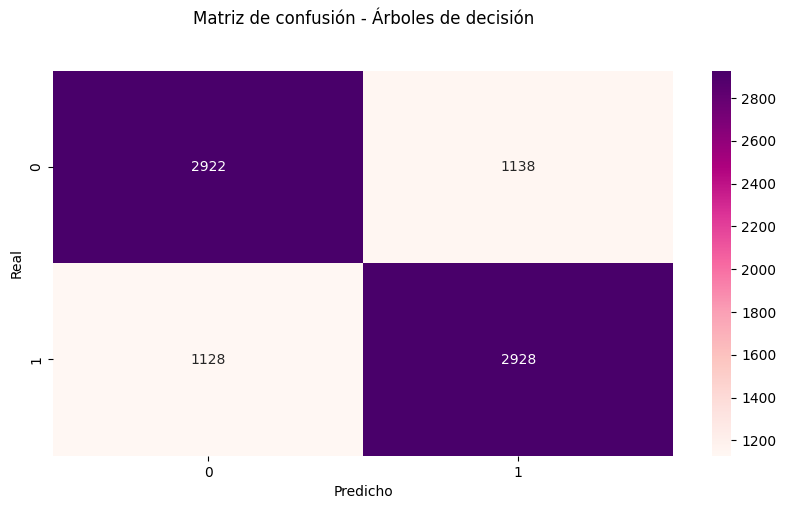

In [32]:
dt_cnf_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))

mpl.rcParams['figure.figsize']=(10,5)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(dt_cnf_matrix, annot=True, cmap="RdPu" ,fmt='g')
plt.title('Matriz de confusión - Árboles de decisión', y=1.1)
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

La matriz de confusión demuestra que el modelo identificó correctamente los éxitos y los fracasos la mayor parte del tiempo.

In [33]:
accuracy = metrics.accuracy_score(y_test, y_pred) * 100
precision = metrics.precision_score(y_test, y_pred) * 100
recall = metrics.recall_score(y_test, y_pred) * 100

print(f'Accuracy: {accuracy:.2f}%')
print(f'Precision: {precision:.2f}%')
print(f'Recall: {recall:.2f}%')

Accuracy: 72.08%
Precision: 72.01%
Recall: 72.19%


El modelo es bastante exacto, preciso y tiene buen recall. De todas formas, también se realizará cross-validation para intentar lograr resultados aún mejores.

#### Cross Validation

In [44]:
param_grid = {
              'criterion' :['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth' : [4, 5, 6, 7, 8, 9],
              'min_samples_leaf': [1, 5, 10, 15, 20, 50],
              'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
             }

grid_search = GridSearchCV(DT, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación:")
print(grid_search.best_score_)

Fitting 10 folds for each of 1296 candidates, totalling 12960 fits


/home/tyler/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/tyler/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/tyler/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/tyler/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  war

Mejores parámetros encontrados:
{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 10, 'splitter': 'best'}
Mejor puntuación:
0.8070050452331244


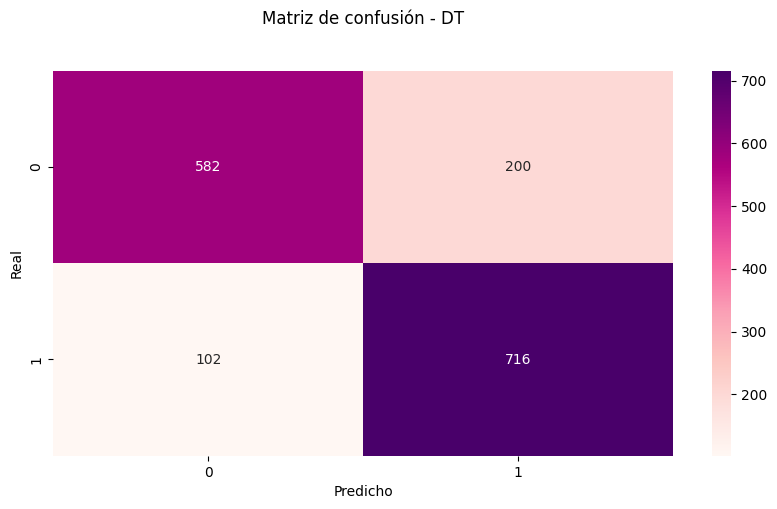

In [45]:
y_pred = grid_search.predict(X_test)

DT_final_cnf_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))

mpl.rcParams['figure.figsize']=(10,5)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(DT_final_cnf_matrix, annot=True, cmap="RdPu" ,fmt='g')
plt.title('Matriz de confusión - DT', y=1.1)
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

In [46]:
accuracy = metrics.accuracy_score(y_test, y_pred) * 100
precision = metrics.precision_score(y_test, y_pred) * 100
recall = metrics.recall_score(y_test, y_pred) * 100

print(f'Accuracy: {accuracy:.2f}%')
print(f'Precision: {precision:.2f}%')
print(f'Recall: {recall:.2f}%')

Accuracy: 81.12%
Precision: 78.17%
Recall: 87.53%


El modelo mejoró un 9.04% en Accuracy, 6.16% en Precision y 15.34% Recall haciendo el tuning de los hiperparámetros.

### Bosques aleatorios

In [34]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

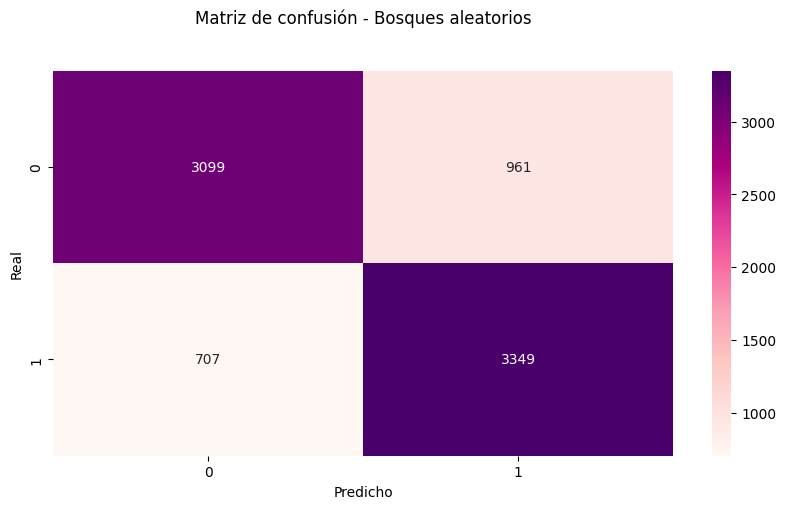

In [35]:
rf_cnf_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))

mpl.rcParams['figure.figsize']=(10,5)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(rf_cnf_matrix, annot=True, cmap="RdPu" ,fmt='g')
plt.title('Matriz de confusión - Bosques aleatorios', y=1.1)
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

La matriz de confusión demuestra que el modelo identificó correctamente los éxitos y los fracasos la mayor parte del tiempo.

In [36]:
accuracy = metrics.accuracy_score(y_test, y_pred) * 100
precision = metrics.precision_score(y_test, y_pred) * 100
recall = metrics.recall_score(y_test, y_pred) * 100

print(f'Accuracy: {accuracy:.2f}%')
print(f'Precision: {precision:.2f}%')
print(f'Recall: {recall:.2f}%')

Accuracy: 79.45%
Precision: 77.70%
Recall: 82.57%


Este último modelo también es bastante exacto, preciso y tiene buen recall. En este caso, también se realizará cross-validation para intentar lograr resultados aún mejores.

#### Cross Validation

In [47]:
param_grid = {
              'n_estimators' :[100, 110, 120, 130, 140, 150],
              'max_depth' : [5, 10, 15],
              'min_samples_leaf': [1, 3, 5, 10],
             }

grid_search = GridSearchCV(RF, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación:")
print(grid_search.best_score_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Mejores parámetros encontrados:
{'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 150}
Mejor puntuación:
0.8438970076548366


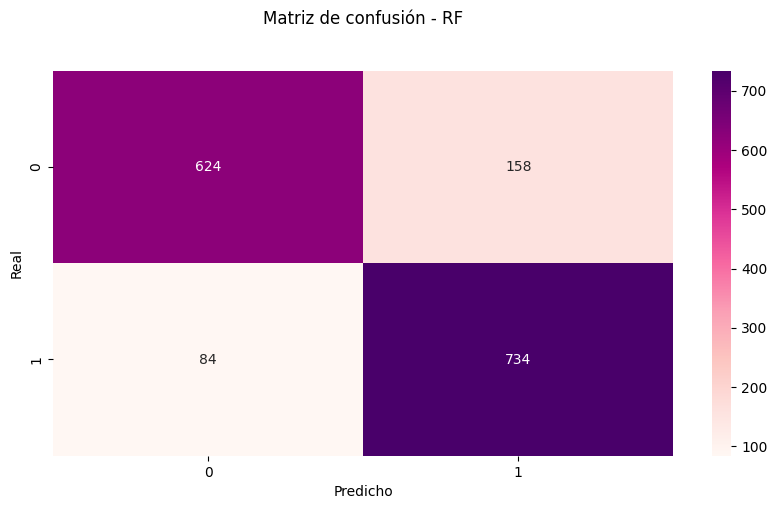

In [52]:
y_pred = grid_search.predict(X_test)

RF_final_cnf_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))

mpl.rcParams['figure.figsize']=(10,5)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(RF_final_cnf_matrix, annot=True, cmap="RdPu" ,fmt='g')
plt.title('Matriz de confusión - RF', y=1.1)
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

In [53]:
accuracy = metrics.accuracy_score(y_test, y_pred) * 100
precision = metrics.precision_score(y_test, y_pred) * 100
recall = metrics.recall_score(y_test, y_pred) * 100

print(f'Accuracy: {accuracy:.2f}%')
print(f'Precision: {precision:.2f}%')
print(f'Recall: {recall:.2f}%')

Accuracy: 84.88%
Precision: 82.29%
Recall: 89.73%


El modelo mejoró un 5.43% en Accuracy, 4.59% en Precision y 7.16% Recall haciendo el tuning de los hiperparámetros.

### Comparativa de modelos

| Modelo | Accuracy | Precision | Recall |
|:-:|:-:|:-:|:-:|
| Regresión Logística | 77.62% | 71.66% | 93.03% |
| Árboles de decisión | 81.12% | 78.17% | 87.53% |
| Bosques aleatorios | 84.73% | 82.29% | 89.73% |

**El modelo con mejores métricas es el de Bosques aleatorios**. Así que será el escogido, en su última versión.


### Feature importance

In [60]:
RF = RandomForestClassifier(max_depth=15, min_samples_leaf=1, n_estimators=150)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

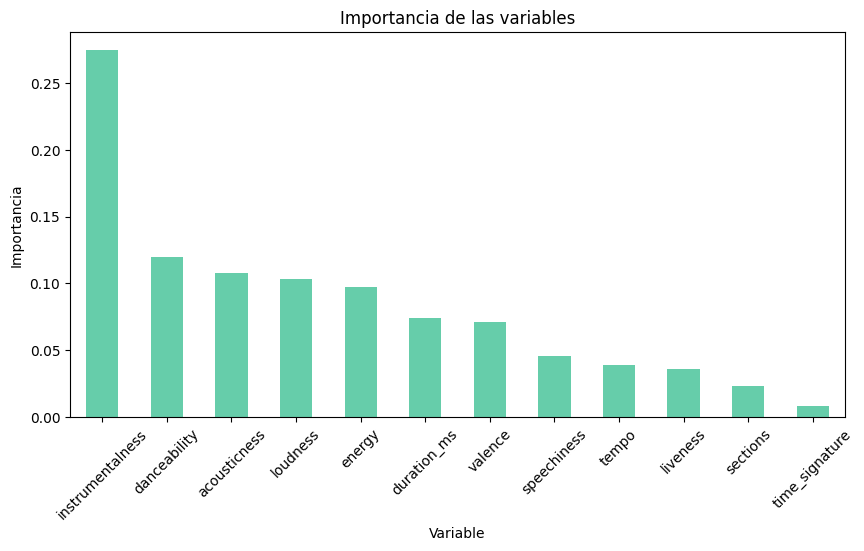

In [61]:
feature_importance = RF.feature_importances_
df_indep_columns = pd.DataFrame(indep_vars)
df_all_songs_feat = pd.DataFrame(feature_importance)
all_songs_feat_vars = pd.concat([df_indep_columns, df_all_songs_feat], axis = 1)
all_songs_feat_vars.columns = ['Variable', 'Feature importance']
all_songs_feat_vars = all_songs_feat_vars.set_index('Variable')
all_songs_feat_vars = all_songs_feat_vars.sort_values(by=['Feature importance'], ascending = False)

all_songs_feat_vars.plot(kind='bar', color = "mediumaquamarine", title = "Importancia de las variables", legend = None)
plt.ylabel('Importancia')
plt.xticks(rotation=45)
plt.show()

Las variables con mayor importancia, son `instrumentalness`, `danceability` y `acousticness`.

### ¿Cómo ha cambiado la importancia de las variables durante el tiempo? 

Es importante notar que el comportamiento musical, varía con las décadas, por lo que podría ser importante realizar el análisis en cada una de ellas.

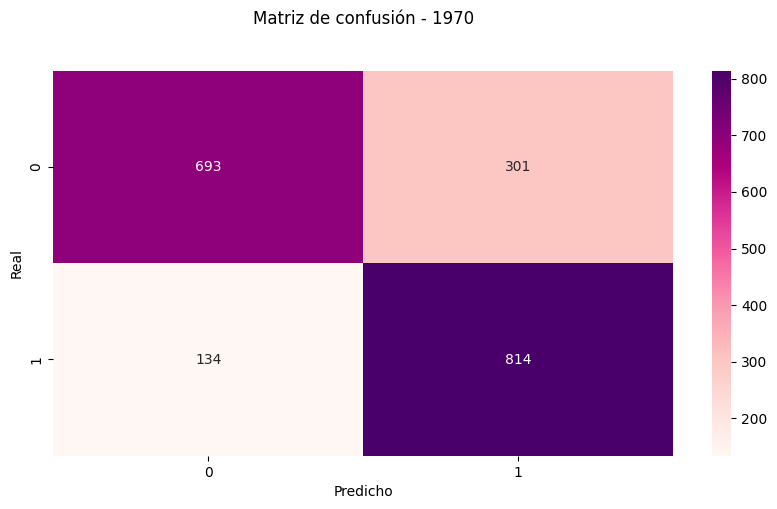

Métricas para la década: 1970
---------------------------------
Accuracy: 77.60%
Precision: 73.00%
Recall: 85.86%


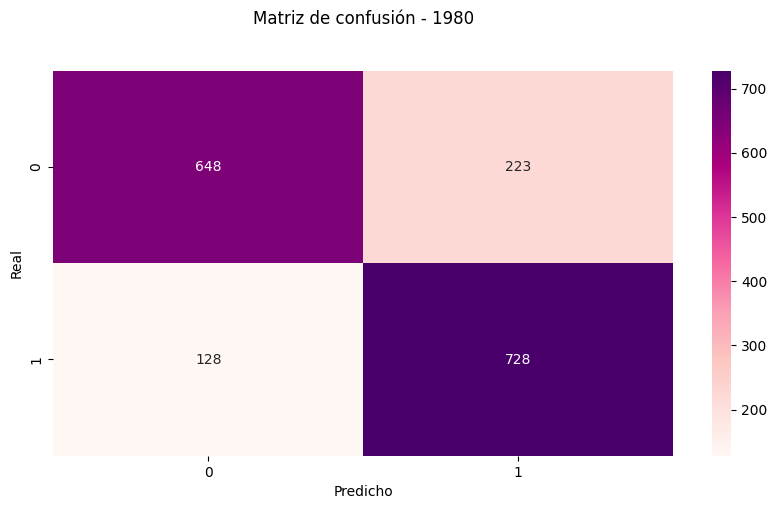

Métricas para la década: 1980
---------------------------------
Accuracy: 79.68%
Precision: 76.55%
Recall: 85.05%


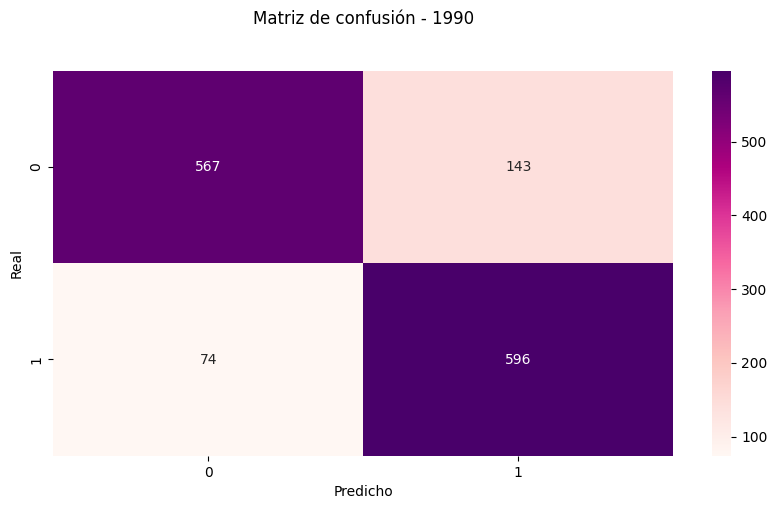

Métricas para la década: 1990
---------------------------------
Accuracy: 84.28%
Precision: 80.65%
Recall: 88.96%


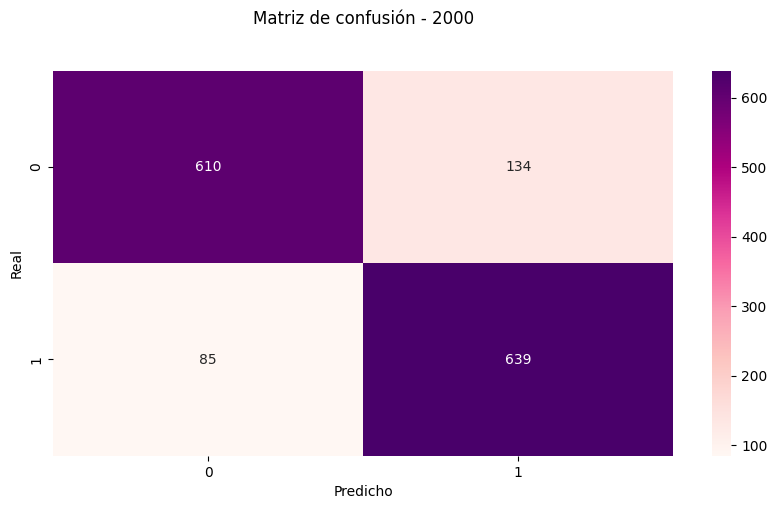

Métricas para la década: 2000
---------------------------------
Accuracy: 85.08%
Precision: 82.66%
Recall: 88.26%


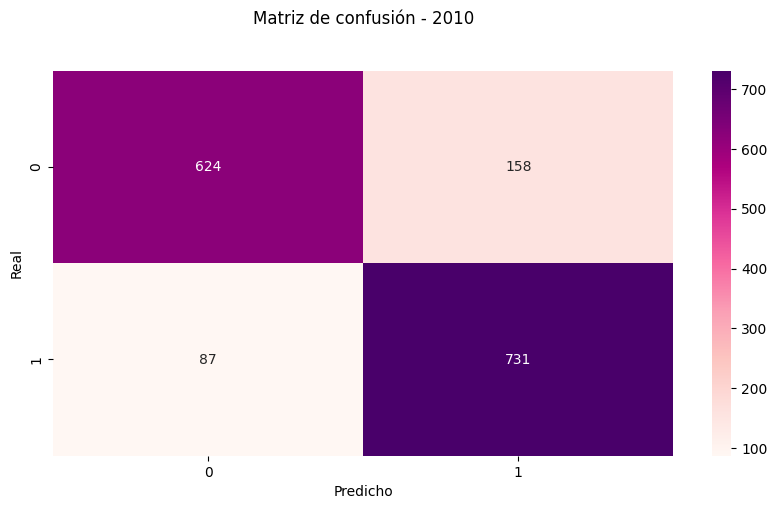

Métricas para la década: 2010
---------------------------------
Accuracy: 84.69%
Precision: 82.23%
Recall: 89.36%


In [63]:
indep_vars = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'duration_ms', 'sections']

decades = [1970, 1980, 1990, 2000, 2010]
all_songs_feat_vars = pd.DataFrame(index=indep_vars)

for decade in decades:
    df_decade = clean_df[clean_df['decade'] == decade].drop('decade', axis=1)
    
    X = df_decade[indep_vars]
    y = df_decade['target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    
    RF = RandomForestClassifier(max_depth=15, min_samples_leaf=1, n_estimators=150)
    RF.fit(X_train, y_train)
    y_pred = RF.predict(X_test)
    
    rf_cnf_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))
    
    mpl.rcParams['figure.figsize']=(10,5)
    class_names = [0, 1]
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    
    sns.heatmap(rf_cnf_matrix, annot=True, cmap="RdPu", fmt='g')
    plt.title(f'Matriz de confusión - {decade}', y=1.1)
    plt.ylabel('Real')
    plt.xlabel('Predicho')
    plt.show()
    
    accuracy = metrics.accuracy_score(y_test, y_pred) * 100
    precision = metrics.precision_score(y_test, y_pred) * 100
    recall = metrics.recall_score(y_test, y_pred) * 100
    
    print(f'Métricas para la década: {decade}')
    print(f'---------------------------------')
    print(f'Accuracy: {accuracy:.2f}%')
    print(f'Precision: {precision:.2f}%')
    print(f'Recall: {recall:.2f}%')
    
    feature_importance = RF.feature_importances_
    df_all_songs_feat = pd.DataFrame(feature_importance, columns=[f'Importancia de las variables {decade}'], index=indep_vars)
    all_songs_feat_vars = pd.concat([all_songs_feat_vars, df_all_songs_feat], axis=1)

In [64]:
all_songs_feat_vars

,Importancia de las variables 1970,Importancia de las variables 1980,Importancia de las variables 1990,Importancia de las variables 2000,Importancia de las variables 2010
danceability,0.092297,0.116149,0.141187,0.124608,0.099706
energy,0.086269,0.069189,0.072623,0.074005,0.097288
loudness,0.079645,0.066718,0.070946,0.107633,0.100143
speechiness,0.107209,0.103866,0.063654,0.050277,0.044727
acousticness,0.133939,0.134068,0.138594,0.098155,0.101644
instrumentalness,0.150042,0.163350,0.163956,0.272090,0.311690
liveness,0.053562,0.054624,0.044202,0.036727,0.037969
valence,0.068568,0.072889,0.054795,0.060438,0.069198
tempo,0.060481,0.053864,0.040894,0.038847,0.038101
time_signature,0.011940,0.006921,0.004054,0.003839,0.006995


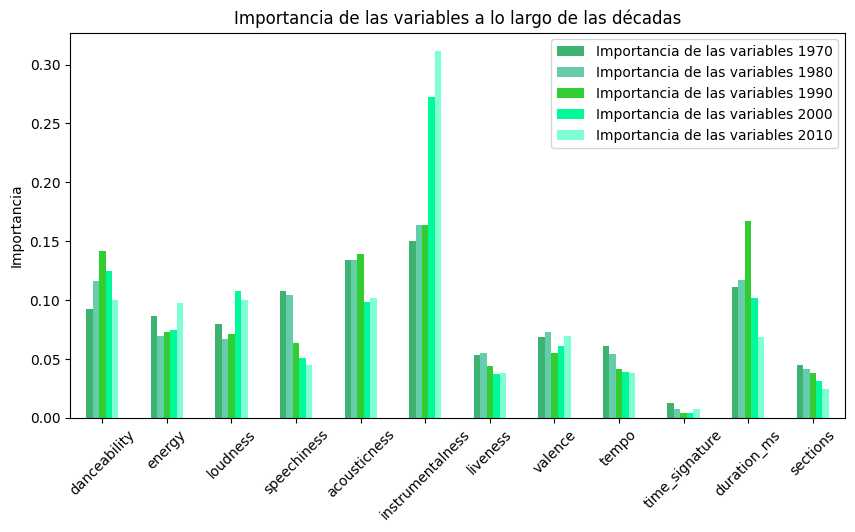

In [65]:
colors = ['mediumseagreen', 'mediumaquamarine', 'limegreen', 'mediumspringgreen', 'aquamarine']
color_palette = sns.color_palette(colors)
all_songs_feat_vars.plot(kind='bar', color=color_palette, title="Importancia de las variables a lo largo de las décadas", legend=True)
plt.ylabel('Importancia')
plt.xticks(rotation=45)
plt.show()

Tal como se comentó, la importancia de las variables varía respecto de las décadas, sin embargo, el comportamiento es bastante parecido entre ellas, con la diferencia de que, en las décadas más actuales, la variable `instrumentalness` parece haber tomado más relevancia.

## Conclusiones

1. Se utilizó aprendizaje automático y datos de Spotify para predecir el éxito de las canciones. Las características como el tempo, la energía y la popularidad se analizaron para determinar su correlación con el éxito.

2. Los modelos de aprendizaje automático, como la regresión logística, los árboles de decisión y los bosques aleatorios, fueron utilizados para predecir el éxito de las canciones. Los resultados mostraron que los modelos tuvieron una precisión considerable para predecir si una canción será popular o no.

3. El análisis de características de las canciones utilizando datos de Spotify puede ser útil para predecir el éxito de las canciones en las listas.

4. El modelo de bosques aleatorios fue el que tuvo el mejor rendimiento en términos de precisión, superando a la regresión logística y a los árboles de decisión.

5. Las características más importantes para predecir el éxito de las canciones fueron instrumentalness (instrumentalidad de la canción), danceability (bailabilidad de la canción) y acousticness (contenido acústico de la canción).

6. Se observaron diferencias claras entre las características de canciones exitosas y fracasos, lo que sugiere que el análisis de características puede ser útil en la selección de características de las canciones para aumentar su éxito en el mercado.

7. Se identificaron algunas limitaciones del estudio, como datos insuficientes para ciertas canciones o artistas, cambios en la popularidad de la música y la ausencia de variables importantes como el marketing y el contexto cultural.

En general, este proyecto demuestra que el análisis de características de las canciones utilizando datos de Spotify y técnicas de aprendizaje automático puede ser útil para predecir el éxito de las canciones. Esto puede tener implicaciones importantes para la industria musical al ayudar a los productores y artistas a seleccionar las características adecuadas para aumentar el éxito de sus canciones en el mercado. Sin embargo, es importante tener en cuenta las limitaciones del estudio y considerar otras variables relevantes más allá de las características musicales.